In [558]:
import numpy as np

# vx**2 + vy**2 = qRB/m       q = N*charge of electron
# x**2 + y**2 = 1
# x0, y0 = 1, 0
# vx0, vy0 = 0, qRB/m

N = 101

t = np.linspace(0, 10, N)
l = np.zeros((len(t), 6))

def B_random(N):
    return np.random.randint(-5, 5, N)

def nonuniform(l, t, B):              # t, u, B
    q = 1
    m = 1
    x, y, z, vx, vy, vz = l
    
    r = np.sqrt(x**2 + y**2)
    
    v = np.sqrt(vx**2 + vy**2)
    v = q*r*B(t)/m
    
    a = q*v*B(t)/m
    ax = -a*(x/r)
    ay = -a*(y/r)
    az = 0
    
    return vx, vy, vz, ax, ay, az

p0 = [0, 1, 0, 1, 0, -1]



In [559]:
from scipy.integrate import odeint
random = odeint(nonuniform, p0, t, args=(B_random,))

C:\Users\Grant\Anaconda2\lib\site-packages\ipykernel\__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


ValueError: setting an array element with a sequence.

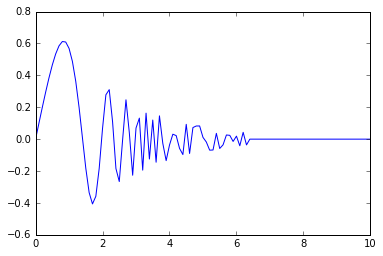

In [432]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(t, random[:,0])
plt.show()

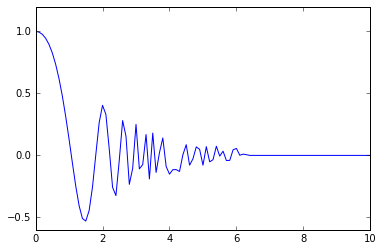

In [433]:
plt.plot(t, random[:,1])
plt.show()

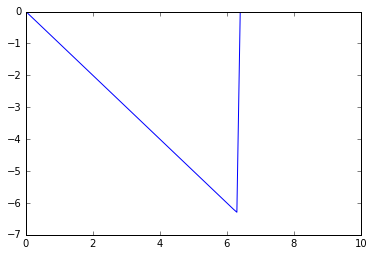

In [434]:
plt.plot(t, random[:,2])
plt.show()

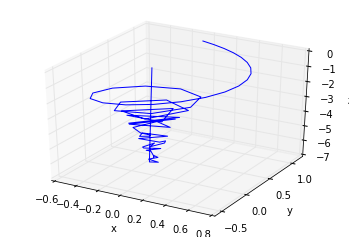

In [362]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(solution[:,0], solution[:,1], solution[:,2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

In [531]:
import numpy as np

# vx**2 + vy**2 = qRB/m       q = N*charge of electron
# x**2 + y**2 = 1
# x0, y0 = 1, 0
# vx0, vy0 = 0, qRB/m

N = 101

t = np.linspace(0, 10, N)
u = np.zeros((len(t), 6))
B = 1

def uniform(u, t, B):              # t, u, B
    q = 1
    m = 1
    x, y, z, vx, vy, vz = u
    
    r = np.sqrt(x**2 + y**2)
    
    v = np.sqrt(vx**2 + vy**2)
    v = q*r*B/m
    
    #vx = -v*x/r
    #vy = -v*y/r
    
    a = q*v*B/m
    ax = -a*(x/r)
    ay = -a*(y/r)
    az = 0
    
    return vx, vy, vz, ax, ay, az

p0 = [ 0,  1, 5, 1,  0, -1]
p1 = [ 1,  0, 5, 0, -1, -1]
p2 = [ 0, -1, 5, -1, 0, -1]
p3 = [-1,  0, 5,  0, 1, -1]


In [534]:
from scipy.integrate import odeint
uniform0 = odeint(uniform, p0, t, args=(B,))
uniform1 = odeint(uniform, p1, t, args=(B,))
uniform2 = odeint(uniform, p2, t, args=(B,))
uniform3 = odeint(uniform, p3, t, args=(B,))

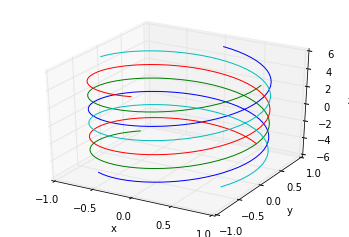

In [535]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(uniform0[:,0], uniform0[:,1], uniform0[:,2])
ax.plot(uniform1[:,0], uniform1[:,1], uniform1[:,2])
ax.plot(uniform2[:,0], uniform2[:,1], uniform2[:,2])
ax.plot(uniform3[:,0], uniform3[:,1], uniform3[:,2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

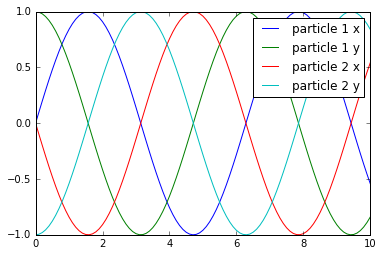

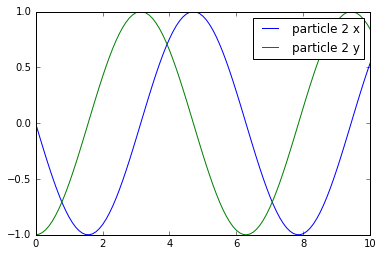

In [540]:
plt.plot(t, uniformpart[:,0], label="particle 1 x")
plt.plot(t, uniformpart[:,1], label="particle 1 y")
plt.plot(t, uniform2[:,0],    label="particle 2 x")
plt.plot(t, uniform2[:,1],    label="particle 2 y")
plt.legend()
plt.show()
#print uniformpart[:,0]
#print uniformpart[:,1]
#print uniform2[:,0]
#print uniform2[:,1]

plt.plot(t, uniform2[:,0], label="particle 2 x")
plt.plot(t, uniform2[:,1], label="particle 2 y")
plt.legend()
plt.show()


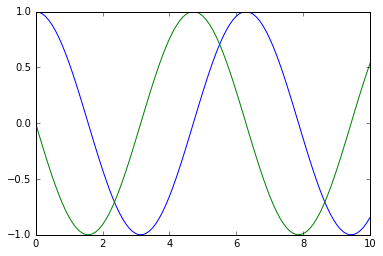

In [537]:
plt.plot(t, uniformpart[:,3])
plt.plot(t, uniformpart[:,4])
plt.plot(t, uniformpart[:,5])
plt.show()

In [538]:
energy = (1.0/2)*((uniformpart[:,3])**2 + (uniformpart[:,4])**2)
print energy

[ 0.5         0.5         0.5         0.5         0.5         0.49999998
  0.49999999  0.5         0.5         0.5         0.49999999  0.49999999
  0.49999999  0.49999999  0.49999999  0.49999999  0.49999999  0.49999998
  0.49999998  0.49999998  0.49999998  0.49999998  0.49999998  0.49999997
  0.49999997  0.49999997  0.49999997  0.49999998  0.49999998  0.49999998
  0.49999999  0.49999999  0.49999999  0.49999999  0.49999999  0.49999999
  0.5         0.5         0.5         0.5         0.5         0.5
  0.50000001  0.50000001  0.50000001  0.50000001  0.50000001  0.50000002
  0.50000002  0.50000002  0.50000002  0.50000002  0.50000002  0.50000003
  0.50000003  0.50000003  0.50000003  0.50000003  0.50000004  0.50000004
  0.50000004  0.50000004  0.50000005  0.50000005  0.50000005  0.50000005
  0.50000005  0.50000006  0.50000006  0.50000006  0.50000006  0.50000007
  0.50000007  0.50000007  0.50000008  0.50000008  0.50000008  0.50000009
  0.50000009  0.50000009  0.5000001   0.5000001   0.500000

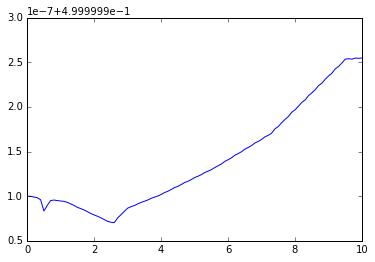

In [539]:
plt.plot(t, energy)
plt.show()

In [551]:
import numpy as np

# vx**2 + vy**2 = qRB/m       q = N*charge of electron
# x**2 + y**2 = 1
# x0, y0 = 1, 0
# vx0, vy0 = 0, qRB/m

N = 101

t = np.linspace(0, 10, N)
u = np.zeros((len(t), 6))

def B_constant(t):
    return 1

def B_oscillating(t):
    return np.sin(2*np.pi*t)

def B_exponential(t):
    B = np.exp(t)
    return B

def oscillating(u, t, B):              # t, u, B
    q = 1
    m = 1
    x, y, z, vx, vy, vz = u
    
    r = np.sqrt(x**2 + y**2)
    v = np.sqrt(vx**2 + vy**2)
    
    v = q*r*B(t)/m
    #vx = vt*x/r
    #vy = vt*y/r
    #vz = vz
    
    a = q*v*B(t)/m
    ax = -a*(x/r)
    ay = -a*(y/r)
    az = 0 #-a*(/r)
    
    return vx, vy, vz, ax, ay, az

p0 = [0,  1, 5, -1, 0, -1]
p1 = [0, -1, 5,  1, 0, -1]


In [552]:
from scipy.integrate import odeint
oscillate  = odeint(oscillating, p0, t, args=(B_oscillating,))
oscillate2 = odeint(oscillating, p1, t, args=(B_oscillating,))

t_test = np.linspace(0, 100, 10*N)

test       = odeint(oscillating, p0, t_test, args=(B_oscillating,))
test2      = odeint(oscillating, p1, t_test, args=(B_oscillating,))

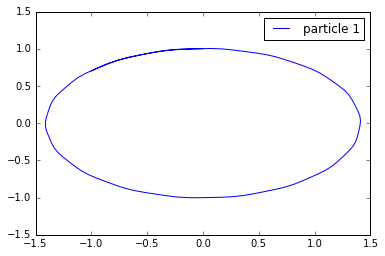

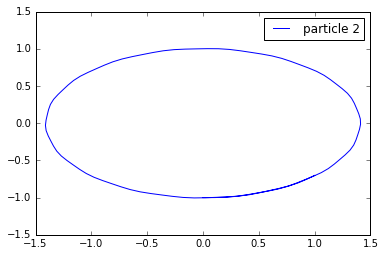

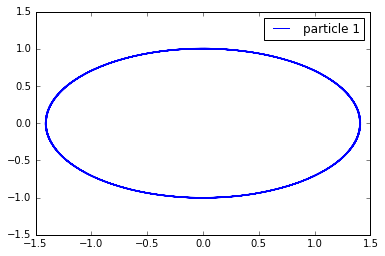

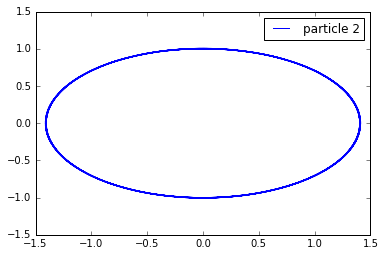

In [553]:
plt.plot(oscillate[:,0],  oscillate[:,1],  label="particle 1")
plt.legend()
plt.show()
plt.plot(oscillate2[:,0], oscillate2[:,1], label="particle 2")
plt.legend()
plt.show()
plt.plot(test[:,0], test[:,1],  label="particle 1")
plt.legend()
plt.show()
plt.plot(test2[:,0], test2[:,1], label="particle 2")
plt.legend()
plt.show()
#print uniformpart[:,0]
#print uniformpart[:,1]
#print uniform2[:,0]
#print uniform2[:,1]

#plt.plot(t, uniform2[:,0], label="particle 2 x")
#plt.plot(t, uniform2[:,1], label="particle 2 y")
#plt.legend()
#plt.show()


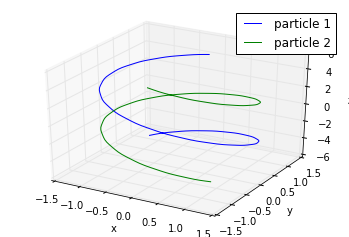

In [554]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(oscillate[:,0],  oscillate[:,1],  oscillate[:,2], label="particle 1")
ax.plot(oscillate2[:,0], oscillate2[:,1], oscillate[:,2], label="particle 2")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.legend()
plt.show()


In [555]:
from scipy.integrate import odeint
exponential = odeint(oscillating, p0, t, args=(B_exponential,))

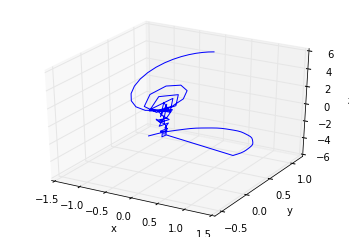

In [556]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(exponential[:,0], exponential[:,1], exponential[:,2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

In [557]:
import numpy as np

# vx**2 + vy**2 = qRB/m       q = N*charge of electron
# x**2 + y**2 = 1
# x0, y0 = 1, 0
# vx0, vy0 = 0, qRB/m

N = 101

t = np.linspace(0, 10, N)
u = np.zeros((len(t), 12))
B = 1

def uniform2(u, t, B):              # t, u, B
    q = 1
    m = 1
    x1, y1, z1, vx1, vy1, vz1, x2, y2, z2, vx2, vy2, vz2 = u
    
    d = np.sqrt((x2-x1)**2 +(y2-y1)**2)
    d = np.sqrt(2)
    
    r1 = np.sqrt(x1**2 + y1**2)
    r2 = np.sqrt(x2**2 + y2**2)
    
    v1 = np.sqrt(vx1**2 + vy1**2)
    v1 = q*r1*B/m
    v2 = np.sqrt(vx2**2 + vy2**2)
    v2 = q*r2*B/m
    
    a1 = q*v1*B/m
    ax1 = -a1*(x1/r1)
    ay1 = -a1*(y1/r1)
    az1 = -a1*(z1/r1)
    
    a2 = q*v2*B/m
    ax2 = -a2*(x2/r2)
    ay2 = -a2*(y2/r2)
    az2 = -a2*(z2/r2)
    
    return vx1, vy1, vz1, ax1, ay1, az1, vx2, vy2, vz2, ax2, ay2, az2

p0 = [0,  1, 5, 0, 0, 0,
      0, -1, 5, 0, 0, -2]


In [450]:
twoparticles = odeint(uniform2, p0, t, args=(B,))

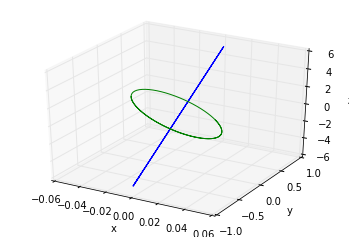

In [451]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(twoparticles[:,0], twoparticles[:,1], twoparticles[:,2])
ax.plot(twoparticles[:,6], twoparticles[:,7], twoparticles[:,8])

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

In [339]:
p1 = [1, 0, 5, 0, 0, -1,
     -1, 0, 5, 0, 0, -1]

part2 = odeint(uniform2, p1, t, args=(B,))

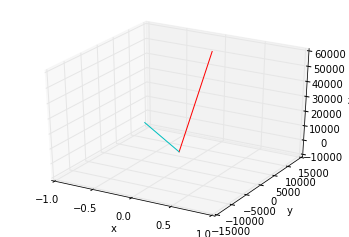

In [353]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(part2[:,0], part2[:,1], part2[:,2])
ax.plot(part2[:,6], part2[:,7], part2[:,8])

ax.plot(twoparticles[:,0], twoparticles[:,1], twoparticles[:,2])
ax.plot(twoparticles[:,6], twoparticles[:,7], twoparticles[:,8])

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

In [636]:
import numpy as np

# vx**2 + vy**2 = qRB/m       q = N*charge of electron
# x**2 + y**2 = 1
# x0, y0 = 1, 0
# vx0, vy0 = 0, qRB/m

N = 101

t = np.linspace(0, 10, N)
u = np.zeros((len(t), 48))
B = 1

def ring(u, t, B):              # t, u, B
    q = 1
    m = 1
    x1, y1, z1, vx1, vy1, vz1, x2, y2, z2, vx2, vy2, vz2, x3, y3, z3, vx3, vy3, vz3, x4, y4, z4, vx4, vy4, vz4, x5, y5, z5, vx5, vy5, vz5, x6, y6, z6, vx6, vy6, vz6, x7, y7, z7, vx7, vy7, vz7, x8, y8, z8, vx8, vy8, vz8 = u
    
    
    #Radius of the ring (should always be 1)
    R1 = np.sqrt(x1**2 + y1**2)
    R2 = np.sqrt(x2**2 + y2**2)
    R3 = np.sqrt(x3**2 + y3**2)
    R4 = np.sqrt(x4**2 + y4**2)
    R5 = np.sqrt(x5**2 + y5**2)
    R6 = np.sqrt(x6**2 + y6**2)
    R7 = np.sqrt(x7**2 + y7**2)
    R8 = np.sqrt(x8**2 + y8**2)
    
    #position vector
    r1 = np.sqrt(x1**2 + y1**2 + z1**2)
    r2 = np.sqrt(x2**2 + y2**2 + z2**2)
    r3 = np.sqrt(x3**2 + y3**2 + z3**2)
    r4 = np.sqrt(x4**2 + y4**2 + z4**2)
    r5 = np.sqrt(x5**2 + y5**2 + z5**2)
    r6 = np.sqrt(x6**2 + y6**2 + z6**2)
    r7 = np.sqrt(x7**2 + y7**2 + z7**2)
    r8 = np.sqrt(x8**2 + y8**2 + z8**2)
    
    #radius of rotation
    rp1 = np.sqrt(y1**2 + z1**2)
    rp2 = np.sqrt(y2**2 + z2**2)
    rp3 = np.sqrt(y3**2 + z3**2)
    rp4 = np.sqrt(y4**2 + z4**2)
    rp5 = np.sqrt(y5**2 + z5**2)
    rp6 = np.sqrt(y6**2 + z6**2)
    rp7 = np.sqrt(y7**2 + z7**2)
    rp8 = np.sqrt(y8**2 + z8**2)
    
    
    #velocity in direction of rotation
    vp1 = np.sqrt(vy1**2 + vz1**2)
    vp2 = np.sqrt(vy2**2 + vz2**2)
    vp3 = np.sqrt(vy3**2 + vz3**2)
    vp4 = np.sqrt(vy4**2 + vz4**2)
    vp5 = np.sqrt(vy5**2 + vz5**2)
    vp6 = np.sqrt(vy6**2 + vz6**2)
    vp7 = np.sqrt(vy7**2 + vz7**2)
    vp8 = np.sqrt(vy8**2 + vz8**2)
    
    #transverse velocity
    '''
    vt1 = np.sqrt(vx1**2 + vy1**2)
    vt2 = np.sqrt(vx2**2 + vy2**2)
    vt3 = np.sqrt(vx3**2 + vy3**2)
    vt4 = np.sqrt(vx4**2 + vy4**2)
    vt5 = np.sqrt(vx5**2 + vy5**2)
    vt6 = np.sqrt(vx6**2 + vy6**2)
    vt7 = np.sqrt(vx7**2 + vy7**2)
    vt8 = np.sqrt(vx8**2 + vy8**2)
    '''
    
    #vt8 = q*R8*B/m
    
    #velocity z component of rotation
    vz1 = -vp1*(z1/rp1)
    vz2 = -vp2*(z2/rp2)
    vz3 = 0
    vz4 = -vp4*(z4/rp4)
    
    vz5 = -vp5*(z5/rp5)
    vz6 = -vp6*(z6/rp6)
    vz7 = 0
    vz8 = -vp8*(z8/rp8)
    
    #velocity y component of rotation
    vy1 = -vp1*(z1/rp1)
    vy2 = -vp2*(z2/rp2)
    vy3 = 0
    vy4 = -vp4*(z4/rp4)
    
    vy5 = -vp5*(z5/rp5)
    vy6 = -vp6*(z6/rp6)
    vy7 = 0
    vy8 = -vp8*(z8/rp8)
    
    #acceleration??
    at1 = q*vt1*B/m
    
    at2 = q*vt2*B/m
    
    at3 = q*vt3*B/m
    
    at4 = q*vt4*B/m
    
    at5 = q*vt5*B/m
    
    at6 = q*vt6*B/m
    
    at7 = q*vt7*B/m
    
    at8 = q*vt8*B/m
    
    
    return [vx1, vy1, vz1, ax1, ay1, az1,
            vx2, vy2, vz2, ax2, ay2, az2,
            vx3, vy3, vz3, ax3, ay3, az3,
            vx4, vy4, vz4, ax4, ay4, az4,
            vx5, vy5, vz5, ax5, ay5, az5,
            vx6, vy6, vz6, ax6, ay6, az6,
            vx7, vy7, vz7, ax7, ay7, az7,
            vx8, vy8, vz8, ax8, ay8, az8]

x0 = 1.0/np.sqrt(2)
p0 = [0,   1, 0, 0, 0, 1,
     x0,  x0, 0, 0, 0, x0,
      1,   0, 0, 0, 0, 0,
     x0, -x0, 0, 0, 0, -x0,
      0,  -1, 0, 0, 0, -1,
    -x0, -x0, 0, 0, 0, -x0,
     -1,   0, 0, 0, 0, 0,
    -x0,  x0, 0, 0, 0, x0]


In [637]:
from scipy.integrate import odeint
ring_path = odeint(ring, p0, t, args=(B,))

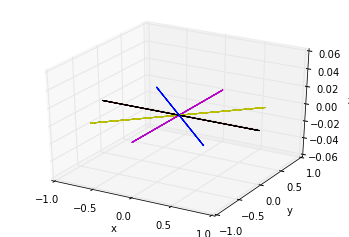

In [638]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(ring_path[:,0], ring_path[:,1], ring_path[:,2])
ax.plot(ring_path[:,6], ring_path[:,7], ring_path[:,8])
ax.plot(ring_path[:,12], ring_path[:,13], ring_path[:,14])
ax.plot(ring_path[:,18], ring_path[:,19], ring_path[:,20])
ax.plot(ring_path[:,24], ring_path[:,25], ring_path[:,26])
ax.plot(ring_path[:,30], ring_path[:,31], ring_path[:,32])
ax.plot(ring_path[:,36], ring_path[:,37], ring_path[:,38])
ax.plot(ring_path[:,42], ring_path[:,43], ring_path[:,44])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

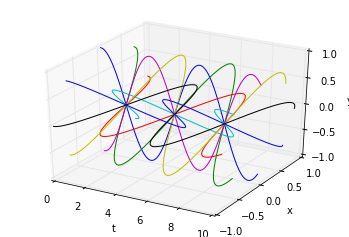

In [626]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(t, ring_path[:,0], ring_path[:,1])
ax.plot(t, ring_path[:,6], ring_path[:,7])
ax.plot(t, ring_path[:,12], ring_path[:,13])
ax.plot(t, ring_path[:,18], ring_path[:,19])
ax.plot(t, ring_path[:,24], ring_path[:,25])
ax.plot(t, ring_path[:,30], ring_path[:,31])
ax.plot(t, ring_path[:,36], ring_path[:,37])
ax.plot(t, ring_path[:,42], ring_path[:,43])
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('y')
plt.show()

In [599]:
non_uniform_ring = odeint(ring, p0, t, args=(B_oscillating,))

C:\Users\Grant\Anaconda2\lib\site-packages\ipykernel\__main__.py:29: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


TypeError: unsupported operand type(s) for *: 'float' and 'function'

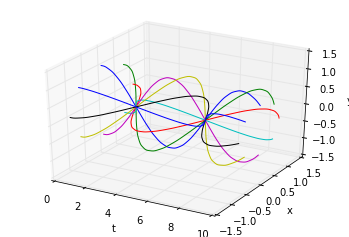

In [582]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(t, non_uniform_ring[:,0], non_uniform_ring[:,1])
ax.plot(t, non_uniform_ring[:,6], non_uniform_ring[:,7])
ax.plot(t, non_uniform_ring[:,12], non_uniform_ring[:,13])
ax.plot(t, non_uniform_ring[:,18], non_uniform_ring[:,19])
ax.plot(t, non_uniform_ring[:,24], non_uniform_ring[:,25])
ax.plot(t, non_uniform_ring[:,30], non_uniform_ring[:,31])
ax.plot(t, non_uniform_ring[:,36], non_uniform_ring[:,37])
ax.plot(t, non_uniform_ring[:,42], non_uniform_ring[:,43])
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('y')
plt.show()

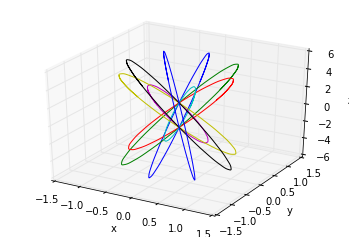

In [583]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(non_uniform_ring[:,0], non_uniform_ring[:,1], non_uniform_ring[:,2])
ax.plot(non_uniform_ring[:,6], non_uniform_ring[:,7], non_uniform_ring[:,8])
ax.plot(non_uniform_ring[:,12], non_uniform_ring[:,13], non_uniform_ring[:,14])
ax.plot(non_uniform_ring[:,18], non_uniform_ring[:,19], non_uniform_ring[:,20])
ax.plot(non_uniform_ring[:,24], non_uniform_ring[:,25], non_uniform_ring[:,26])
ax.plot(non_uniform_ring[:,30], non_uniform_ring[:,31], non_uniform_ring[:,32])
ax.plot(non_uniform_ring[:,36], non_uniform_ring[:,37], non_uniform_ring[:,38])
ax.plot(non_uniform_ring[:,42], non_uniform_ring[:,43], non_uniform_ring[:,44])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

In [1]:
#3D VECTOR FIELD (UNIFORM B)

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt 
import numpy as np 

#arrow tail
x,y,z = np.meshgrid(np.arange(-.2 , .2 , 0.1),
                    np.arange(-.2 , .2 , 0.1),
                    np.arange(-.2 , .2 , 0.1))
#arrow point 

u = 0
v = 0
w = 1

In [2]:
fig = plt.figure()
ax = fig.gca(projection = '3d')

ax.quiver(x,y,z,u,v,w,
         length =.05,
         color = 'red')

ax.set_title('3d Vector Field *Uniform B in z+ direction')
ax.view_init(elev = 20, azim = 38)
plt.show()

In [3]:
#3D VECTOR FIELD (OSCILLATING w.r.t. TIME)
from matplotlib.pyplot import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt 
import numpy as np 

x,y,z= np.meshgrid(np.arange(-10 , 10 , 2),      #arrow tail
                    np.arange(-10 , 10 , 2),
                    np.arange(-10 , 10 , 2))
 

u = 0                                          #arrow  point
v = 0
w = np.sin(x)

fig = plt.figure(figsize = (20,15))
ax = fig.gca(projection = '3d')

ax.quiver(x,y,z,u,v,w,
         length = 1,
          color='blue')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Torus Immersed in a 3d Vector Field *Uniform B in z+ direction')
ax.view_init(elev = 10, azim = 75)
plt.show()

#Parametric Equations for a Ring Torus (A straight pipe bent and connected at its ends) 

x($\theta$,$\varphi$) = (R  +  r*cos($\theta$)) * cos($\varphi$)

y($\theta$,$\varphi$) = (R + r*cos($\theta$))*sin($\varphi$)

z($\theta$,$\varphi$) = r*sin($\theta$)

FOR:  0 $\leq$ $\theta$ $\leq$ 2$\pi$
   
   &      0 $\leq$ $\varphi$ $\leq$ 2$\pi$
   
Where R is the distance from the center of the Torus to the center of the 
pipe & r is the radius of the pipe.  


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

n =901

theta = np.linspace(0, 2*np.pi, n)   
phi = np.linspace(0, 2*np.pi, n)    
theta, phi = np.meshgrid(theta, phi)
R = 5
r = .35
x = (R + r*np.cos(theta)) * np.cos(phi)
z = (R + r*np.cos(theta)) * np.sin(phi)
y = r * np.sin(theta)

fig = plt.figure(figsize = (30,15))
ax1 = fig.add_subplot(121, projection='3d')
ax1.set_zlim(-7,7)
ax1.plot_surface(x, y, z, rstride=30, cstride=125, color='red', edgecolors='cyan')
ax1.view_init(10, 55)

#############Vector Field 

#B > 0

x,y,z = np.meshgrid(np.arange(-5 , 6 , 3),      #arrow 1 tail
                    np.arange(-5 , 6 , 3),
                    np.arange(-5 , 8 , 3))
 
u = 0                                          #arrow 1 point
v = 0
w = 1

ax = fig.gca(projection = '3d')

ax.quiver(x,y,z,u,v,w,
         length = 2,
         color = 'blue')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Torus Immersed in a 3d Vector Field *Uniform B in z+ direction')


plt.show()